## for more information, you can read the *documentation* `torch.nn`

In [1]:
import torch
from torch import nn # this contains all of python's building blocks for neural networks
import matplotlib.pyplot as plt


# check the pytorch version
torch.__version__

'2.3.0+cpu'

## 1. Data (Preparing and Loading the data)

In [2]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# print the first 5 values for X and y
X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [3]:
# check for the length of X and y
len(X), len(y)

(50, 50)

###  Three datasets

1. Training set
2. Validation set - used to tune the model's parameters
3. test set - used to evaluate the model if it is ready for deployment

In [4]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# the drawback here is that there's little randomness in the splitting of the data

In [5]:
print(f"The length of the x train set: {len(X_train)}")
print(f"The length of the y train set: {len(y_train)}")
print(f"The length of the x test set: {len(X_test)}")
print(f"The length of the y test set: {len(y_test)}")

The length of the x train set: 40
The length of the y train set: 40
The length of the x test set: 10
The length of the y test set: 10


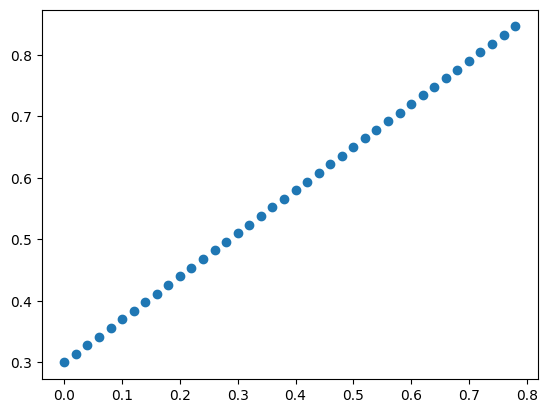

In [6]:
plt.scatter(X_train, y_train)
plt.show()

In [7]:
def  plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      prediction=None):
    '''
    A simple function to plot and compare training, test and predictions
    '''
    plt.figure(figsize=(10, 7))
    # plot the training data in yellow
    plt.scatter(train_data, train_labels, c='y', s=4,label="Training data")
    
    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4,label="Testing data")
    
    # Are there predictions
    if prediction is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, prediction, c='r', s=4, label="Predictions")
    
    # Show the legend
    plt.legend(prop={"size": 14})

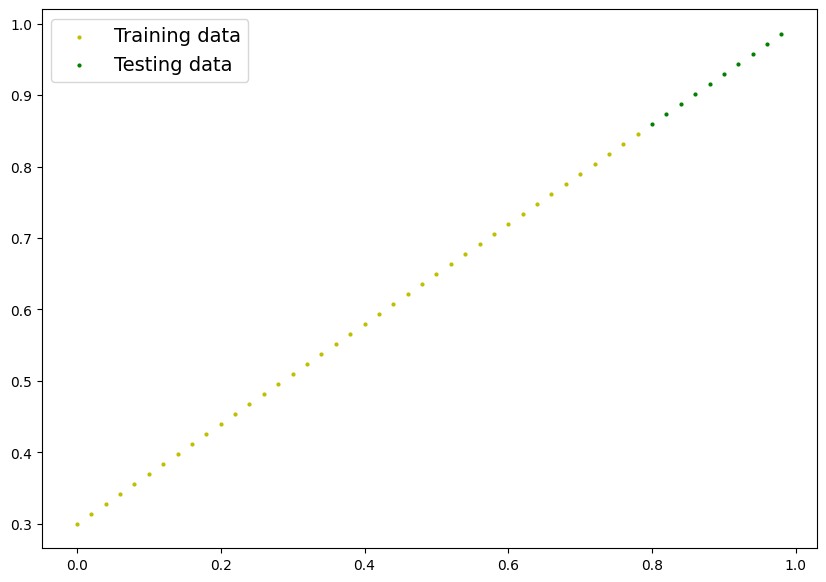

In [8]:
# call the function
plot_predictions()

### Create a model with pytorch

In [9]:
class LinearRegression(nn.Module):
    def __init__(self):
       super().__init__()
       self.weights = nn.Parameter(torch.randn(1, 
                                               requires_grad=True,
                                               dtype=torch.float)) 
       self.bias = nn.Parameter(torch.randn(1, 
                                            requires_grad=True,
                                            dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # takes in an input which is a tensor and outputs a tensor
        return self.weights * x + self.bias # basic linear regression formula

### Model Building Essentials

* torch.nn - used for building neural networks.
* torch.nn.Parameters - What Parameters should our model try and learn. The requires_grad=True means during training it allows that parameter to be tracked and updated.
* torch.nn.Module - This is the base class for all neural network modules.
* torch.optim - This contains an algorithm that help make our weight capture the pattern in the data. They tell the model parameters stored in nn.Parameter how best to change to improve gradient descent and in turn reduce the loss.
* torch.utils.data.Dataset - Represent a map between key(label) and sample(features) pairs of your data. Such as images and their associated labels.
* torch.utils.data.DataLoader - Creates a Python iterable over a torch Dataset(allows you to iterate over data)

In [10]:
# create a random seed
torch.manual_seed(42)

# create an instance of our LinearRegression class
model_0 = LinearRegression()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
# get better description for our model parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using torch.inference_mode()

When we pass data through our model, it's going to run it through the `forward() method`.

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

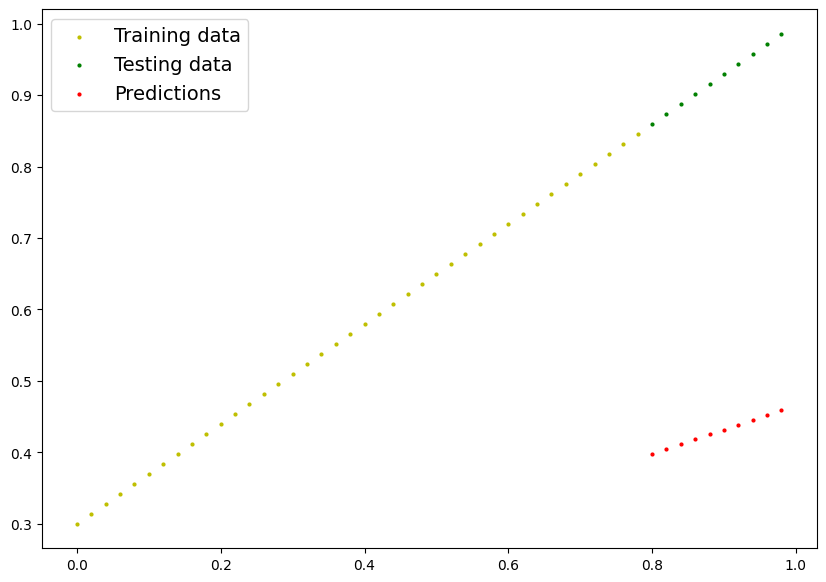

In [13]:
# Let's Visualize our predictions with the ground truth
plot_predictions(prediction=y_preds)

### Train model
The whole idea of training is to move from random parameters to parameters that closely represent the hidden pattern. What i mean is something that generalizes well.


One way to measure the performance of our model is to use a loss function

How does the optimizer works?

Let's say we have a model already initialized with random parameters that are not the true reflection of the model. With an optimizer, we start by taking some steps and paying special attention to the loss. Let's say we increase the weight, and observe that the loss is reducing, that means we're moving in the right direction. We continue in this direction. But if we observe the opposite, we do the reverse. I does the same thing for the bias too. That's how it finds the best or should i say optimal value for the model. 

There's a hyperparameter we set which is the learning rate. What this simply does is that it tells us how much step we should take in our quest to minimize the loss. Let's say i have parameters `OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))`. If we set the learning rate to say 0.01, and the optimizer is adjusting the weight. if the initial weight is 0.3367, it will adjust the hundredth decimal. That's how it works.

So in summary, the loss functions measures how bad our predictions are, while the optimizer adjusts the parameters. So the smaller the learning rate, the smaller the change in the parameter. The larger the rate, the larger the change in the parameter 



In [14]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer  
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) 


### Build a training loop. 
The steps involved are:
* Loop through the data
* Forward Propagation
* Calculate the Loss
* Optimize the zero grad
* Backpropagation
* Gradient Descent

In [15]:
# epoch 
epochs = 100    

# loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # Forward Propagation
    y_pred = model_0(X_train)

    # Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # optimizer zero grad
    optimizer.zero_grad()

    # Backpropagation on the loss wrt the parameters of the model
    loss.backward()

    # step the optimizer
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happening behind the scene
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Training Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Training Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Training Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Training Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Training Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Training Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Training Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Training Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Training Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Training Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Training Loss: 0.02788739837706089 | Test loss: 0.06473556160926819


In [16]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

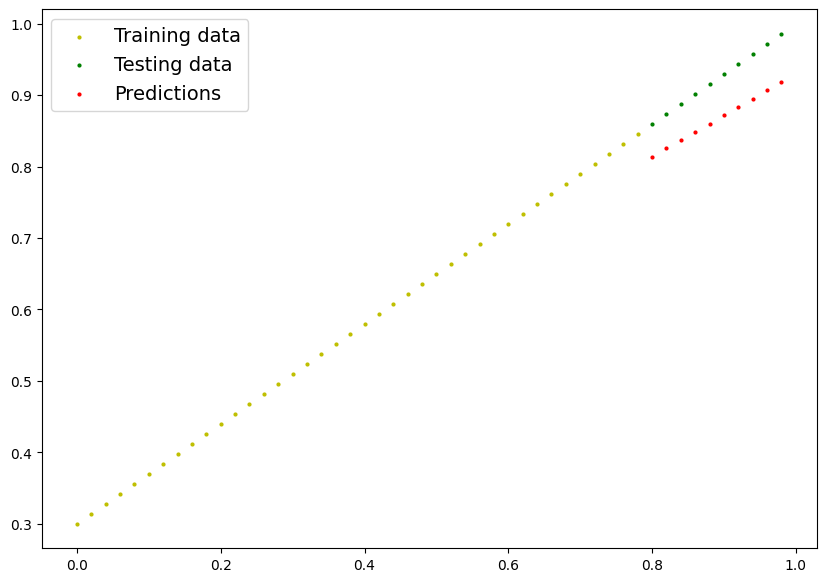

In [17]:
plot_predictions(prediction=y_preds)